In [ ]:
pip install pandas matplotlib scikit-learn openpyxl


In [ ]:
import requests

file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

r = requests.get(file_url)

with open("online_retail.xlsx", "wb") as f:
    f.write(r.content)

print("File downloaded successfully!")


File downloaded successfully!


In [ ]:
import pandas as pd

df = pd.read_excel("online_retail.xlsx")

df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df = df.dropna()

df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
daily = (
    df.groupby(df['InvoiceDate'].dt.date)['Sales']
      .sum()
      .reset_index()
)

daily.columns = ['date', 'sales']
daily['date'] = pd.to_datetime(daily['date'])

daily.head()


,date,sales
0,2010-12-01,46376.49
1,2010-12-02,47316.53
2,2010-12-03,23921.71
3,2010-12-05,31771.60
4,2010-12-06,31215.64


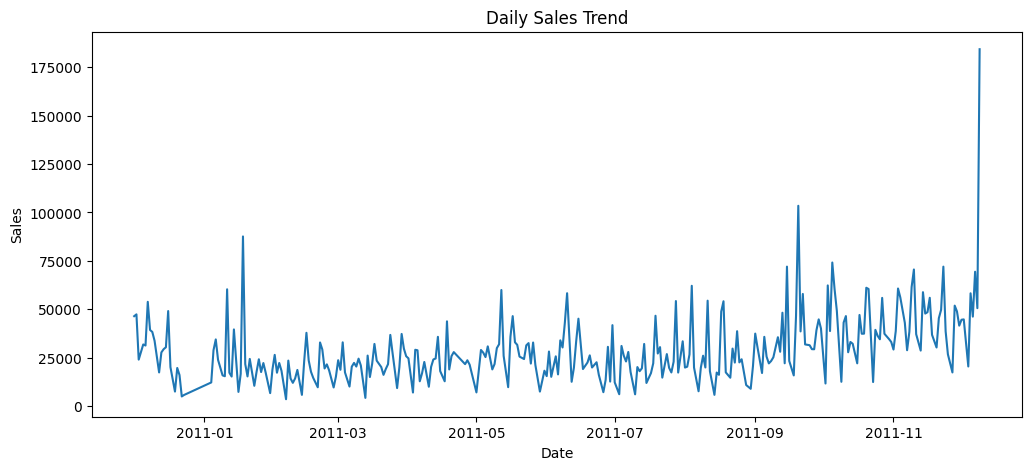

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily['date'], daily['sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [ ]:
daily['day'] = range(len(daily))
daily['lag1'] = daily['sales'].shift(1)
daily['lag7'] = daily['sales'].shift(7)

daily.dropna(inplace=True)


In [ ]:
split = int(len(daily)*0.8)

train = daily[:split]
test = daily[split:]


In [ ]:
from sklearn.linear_model import LinearRegression

features = ['day','lag1','lag7']

model = LinearRegression()
model.fit(train[features], train['sales'])

pred = model.predict(test[features])


In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(test['sales'], pred))


MAE: 16616.095014688835


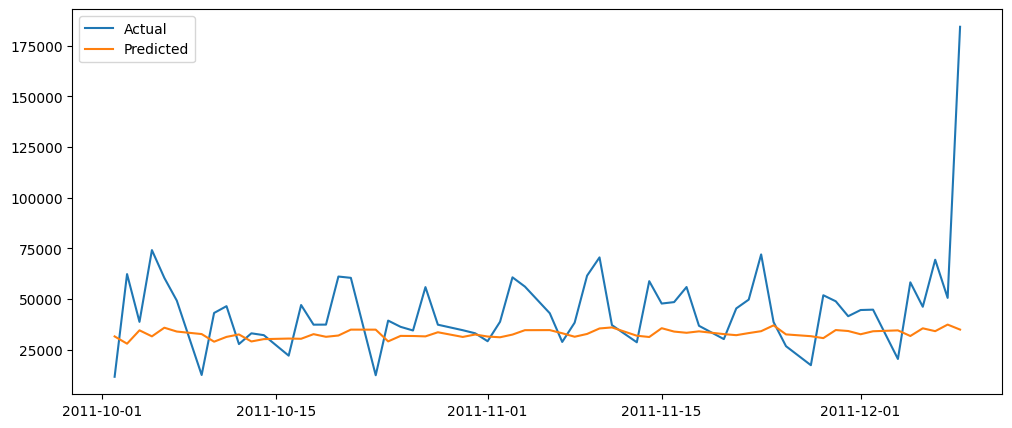

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(test['date'], test['sales'], label="Actual")
plt.plot(test['date'], pred, label="Predicted")

plt.legend()
plt.show()


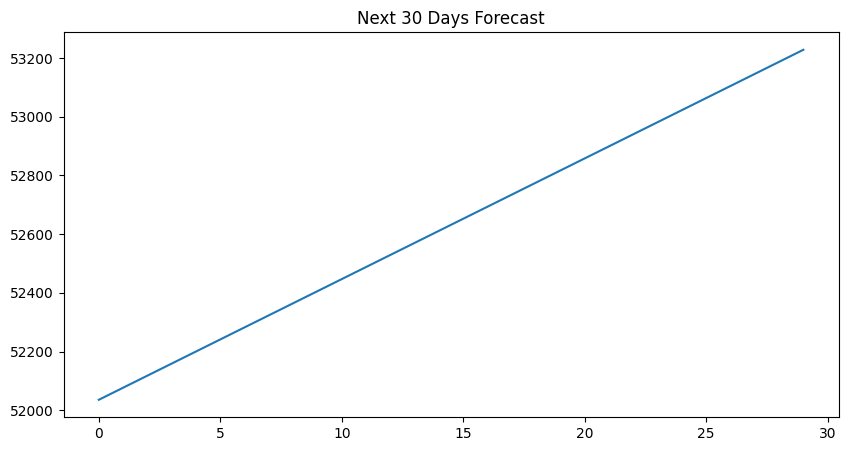

In [ ]:
future_days = 30

last_day = daily['day'].iloc[-1]

future = pd.DataFrame({
    'day': range(last_day+1, last_day+future_days+1),
    'lag1': daily['sales'].iloc[-1],
    'lag7': daily['sales'].iloc[-7]
})

future_pred = model.predict(future)

plt.figure(figsize=(10,5))
plt.plot(future_pred)
plt.title("Next 30 Days Forecast")
plt.show()
